# Quantum Fourier Transform

The QFT is an important subroutine to many quantum algorithms, most famously Shor's algorithm for factoring and the quantum phase estimation (QPE) algorithm for estimating the eigenvalues of a unitary operator [1, 2]. The QFT can be performed efficiently on a quantum computer, using only $O(n^2)$ single-qubit Hadamard gates and two-qubit controlled phase shift gates with an additional $O(n)$ swap gates, where $n$ is the number of qubits. Classical algorithms such as the fast fourier transfrom take $O(2^n\log 2^n)\approx O(n2^n)$ steps to perform the transform.

## Reference

[1] Wikipedia: https://en.wikipedia.org/wiki/Quantum_Fourier_transform

[2] Nielsen, Michael A., Chuang, Isaac L. (2010). Quantum Computation and Quantum Information (2nd ed.). Cambridge: Cambridge University Press.

In [1]:
from notebook_plotting import plot_bitstrings_formatted
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
from braket.circuits import Circuit
from braket.devices import LocalSimulator

from braket.experimental.algorithms.quantum_fourier_transform import (
    quantum_fourier_transform as qft_module
)

# Circuits

In [2]:
n_qubits = 4
circuit = qft_module.quantum_fourier_transform(n_qubits)

In [3]:
circuit = qft_module.inverse_quantum_fourier_transform(n_qubits)
print(circuit)

T  : |    0    |1|     2      |      3       |            4            |      5       |     6      |7|
                                                                                                      
q0 : -SWAP-------------------------------------------------PHASE(-0.39)---PHASE(-0.79)-PHASE(-1.57)-H-
      |                                                    |              |            |              
q1 : -|----SWAP------------------PHASE(-0.79)-PHASE(-1.57)-|------------H-|------------C--------------
      |    |                     |            |            |              |                           
q2 : -|----SWAP---PHASE(-1.57)-H-|------------C------------|--------------C---------------------------
      |           |              |                         |                                          
q3 : -SWAP------H-C--------------C-------------------------C------------------------------------------

T  : |    0    |1|     2      |      3       |            4            |

# Local Simulator

## Example 1

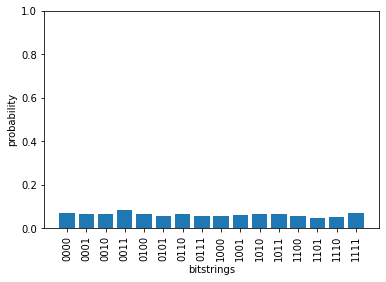

In [4]:
task = qft_module.run_quantum_fourier_transform(
    qubits=range(4), 
    n_shots=1000, 
    device=LocalSimulator()
)
probabilities = task.result().values[0]
plot_bitstrings_formatted(probabilities)
plt.ylim([0, 1])

## Example 2

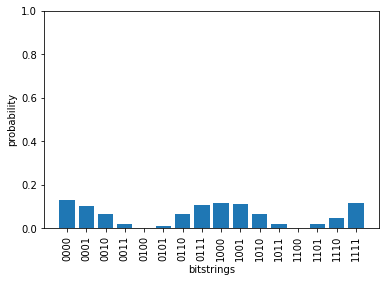

In [5]:
h_tgt = 2
state_prep_circ = Circuit().h(h_tgt)

task = qft_module.run_quantum_fourier_transform(
    qubits=range(4), 
    n_shots=1000, 
    state_prep_circ=state_prep_circ, 
    device=LocalSimulator()
)

probabilities = task.result().values[0]
plot_bitstrings_formatted(probabilities)
plt.ylim([0, 1])

## Example 3

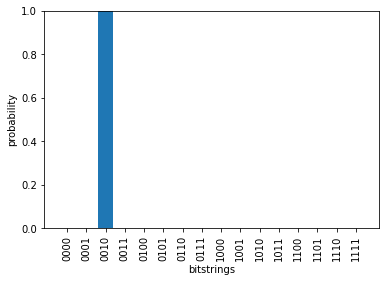

In [6]:
circ = Circuit()
circ.h(range(n_qubits))
for ii in range(n_qubits - 1):
    circ.rz(ii + 1, np.pi / (2**ii))

task = qft_module.run_quantum_fourier_transform(
    qubits=range(4),
    n_shots=1000,
    state_prep_circ=circ,
    inverse=True,  # inverse-qft
    device=LocalSimulator(),
)

probabilities = task.result().values[0]
plot_bitstrings_formatted(probabilities)
plt.ylim([0, 1])

# Quantum devices

In [7]:
from braket.aws import AwsDevice
from braket.tracking import Tracker

tracker = Tracker().start()

# device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")  # OQC Lucy

## Example 1

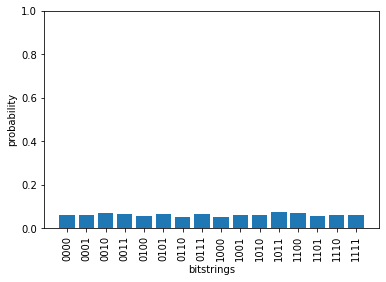

In [8]:
# task = qft_module.run_quantum_fourier_transform(
#     qubits=range(4),
#     n_shots=1000,
#     device=device
# )

# probabilities = task.result().values[0]
# plot_bitstrings_formatted(probabilities)
# plt.ylim([0, 1])

## Example 2

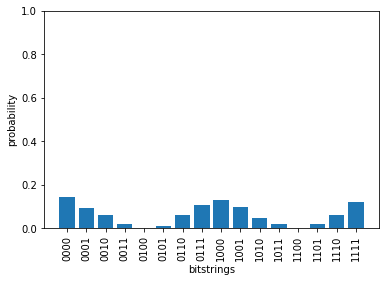

In [9]:
# h_tgt=2
# state_prep_circ = Circuit().h(h_tgt)

# task = qft_module.run_quantum_fourier_transform(
#     qubits=range(4),
#     n_shots=1000,
#     state_prep_circ=state_prep_circ,
#     device=device
# )

# probabilities = task.result().values[0]
# plot_bitstrings_formatted(probabilities)
# plt.ylim([0, 1])

## Example 3

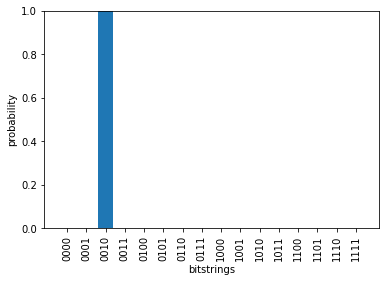

In [10]:
# circ = Circuit()
# circ.h(range(n_qubits))
# for ii in range(n_qubits - 1):
#     circ.rz(ii+1, np.pi/(2**ii))

# task = qft_module.run_quantum_fourier_transform(
#     qubits=range(4),
#     n_shots=1000,
#     state_prep_circ=circ,
#     inverse=True, # inverse-qft
#     device=device
# )

# probabilities = task.result().values[0]
# plot_bitstrings_formatted(probabilities)
# plt.ylim([0, 1])

In [11]:
tracker.stop()
print("Task Summary for device")
print(tracker.quantum_tasks_statistics())

Task Summary for device
{'arn:aws:braket:::device/quantum-simulator/amazon/sv1': {'shots': 3000, 'tasks': {'COMPLETED': 3}, 'execution_duration': datetime.timedelta(microseconds=23000), 'billed_execution_duration': datetime.timedelta(seconds=9)}}
